# RFM

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mahdi-ebrahimi-per/AI/blob/main/7-%20RFM/RFM%20on%20test%20data%20set/RFM.ipynb)



### Load Packages

In [254]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

import seaborn as sns


### Load Data

In [255]:
DataFrame_Path = r"C:\Users\asus\Desktop\MAHDI,Central\Programming\github\Repositories\AI\7- RFM\RFM on real data set\RFM_FINAL.xlsx"
DataFrame = pd.read_excel(DataFrame_Path)
DataFrame = DataFrame.rename(columns = {"TERMINAL_NO":"Terminal", "MONETARY":"Monetary", "FREQUENCY":"Frequency"})
DataFrame.head()

,Terminal,NATIONALCODE,RECENCY,Frequency,Monetary,CATEGORYCODE,CATEGORY_NAME,PROVINCENAME,PROVINCECODE,CITYNAME,CITYCODE,PROJECTNAME,PROJECTCODE,AGENTNAME,AGENTCODE,TERMINALSTATUS,POSBRAND,POSMODEL,POSTYPE
0,7190521.0,117074761.0,47.0,3986.0,474325723.0,7623.0,پارچه، کمد و نخ و ساير کالاهاي خشک,کرمان,NaN,صفاشهر,130026.0,هدايت تراکنش,4040.0,نمايندگي آفتاب رايانه پردازان آذر- آذربايجان شرقي,266.0,درخواست ابطال,Bitel,S910,GPRS
1,7492335.0,504141098.0,59.0,5260.0,132850897.0,5094.0,تعميرگاه لوازم الکترونيکي,خوزستان,29.0,سجاس,117085.0,بازاريابي,6060.0,دفتر نمايندگي تهران,255.0,NaN,Bitel,G870,GPRS
2,3105267.0,358624631.0,48.0,5093.0,349949357.0,4468.0,مراکز پرستاري و مراقبتهاي فردي,يزد,11.0,گلشهر,114007.0,سپند,2020.0,نمايندگي آفتاب رايانه پردازان آذر- آذربايجان شرقي,121.0,NaN,NaN,NaN,GPRS
3,7705624.0,554923703.0,60.0,3845.0,324681189.0,5192.0,کفش فروشيها,گيلان,39.0,تربت حيدريه,129010.0,پروژه خاص,2020.0,نمايندگي آفتاب رايانه پردازان آذر- آذربايجان شرقي,170.0,ابطال شده,NaN,D210,GPRS
4,6010831.0,332955099.0,79.0,4057.0,317579086.0,5966.0,آژانسهاي کاريابي و تامين نيروي کار موقت,کهگيلويه وبويراحمد,36.0,شوش,124019.0,پروژه خاص,5050.0,نمايندگي سامانه الکترونيک انصار-قزوين,177.0,NaN,Bitel,D230,GPRS


### Unique Value

In [256]:
unique_counts = PrettyTable()
unique_counts.field_names = ["Feature", "Unique Value"]

for column in DataFrame.columns:
    count = DataFrame[column].nunique()
    unique_counts.add_row([column, count])


print(unique_counts)    


+----------------+--------------+
|    Feature     | Unique Value |
+----------------+--------------+
|    Terminal    |    37713     |
|  NATIONALCODE  |    37708     |
|    RECENCY     |      89      |
|   Frequency    |    15808     |
|    Monetary    |    37711     |
|  CATEGORYCODE  |     273      |
| CATEGORY_NAME  |     278      |
|  PROVINCENAME  |      29      |
|  PROVINCECODE  |      29      |
|    CITYNAME    |     664      |
|    CITYCODE    |     673      |
|  PROJECTNAME   |      5       |
|  PROJECTCODE   |      5       |
|   AGENTNAME    |      69      |
|   AGENTCODE    |      69      |
| TERMINALSTATUS |      2       |
|    POSBRAND    |      2       |
|    POSMODEL    |      13      |
|    POSTYPE     |      1       |
+----------------+--------------+


### Load Columns

In [257]:
# Terminal = DataFrame.iloc[:, 0]
# Recency = DataFrame.iloc[:, 2]
# Frequency = DataFrame.iloc[:, 3]
# Monetary = DataFrame.iloc[:, 4]

# print(DataFrame["Terminal"])
# print(Terminal.shape == Recency.shape == Frequency.shape)


### Drop NaN Rows

In [258]:
print(DataFrame.isna().sum())

print(f"Befor Drop : {DataFrame.shape}")
DataFrame = pd.concat([DataFrame["Terminal"], DataFrame["Monetary"], DataFrame["Frequency"]], axis=1).dropna()
print(f"After Drop {DataFrame.shape}")


Terminal              9
NATIONALCODE          9
RECENCY               9
Frequency             9
Monetary              9
CATEGORYCODE          9
CATEGORY_NAME         9
PROVINCENAME       1285
PROVINCECODE       1242
CITYNAME             70
CITYCODE             69
PROJECTNAME        6327
PROJECTCODE        6368
AGENTNAME           522
AGENTCODE           564
TERMINALSTATUS    12512
POSBRAND          12647
POSMODEL           2730
POSTYPE               9
dtype: int64
Befor Drop : (37722, 19)
After Drop (37713, 3)


### Frequency Clustering

In [264]:
# Data = np.array(DataFrame["Frequency"].dropna())
Data = np.array(DataFrame["Frequency"])
model = KMeans(n_clusters=7, random_state=0)
model = model.fit(scale(Data).reshape(-1,1))
# print(model.labels_)
idx = np.argsort(model.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(7)

FrequencyClustering = pd.DataFrame(lut[model.labels_])[0]
print(FrequencyClustering)
print(FrequencyClustering.shape)



0        1
1        2
2        1
3        1
4        1
        ..
37708    0
37709    6
37710    6
37711    5
37712    1
Name: 0, Length: 37713, dtype: int64
(37713,)


### Monetary Clustering

In [260]:
# Data = np.array((DataFrame["Monetary"].dropna())/10)
Data = np.array((DataFrame["Monetary"])/10)
model = KMeans(n_clusters=7, random_state=0)
model = model.fit(scale(Data).reshape(-1,1))
# print(model.labels_)
idx = np.argsort(model.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(7)

MonetaryClustering = pd.DataFrame(lut[model.labels_])[0]
print(MonetaryClustering.shape)

print( DataFrame["Terminal"].shape == MonetaryClustering.shape )


(37713,)
True


### F per M Heatmap

In [266]:
print(DataFrame["Terminal"].reset_index()["Terminal"])

0        7190521.0
1        7492335.0
2        3105267.0
3        7705624.0
4        6010831.0
           ...    
37708    4073989.0
37709    6068137.0
37710    4710258.0
37711    4251819.0
37712    2125095.0
Name: Terminal, Length: 37713, dtype: float64


<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

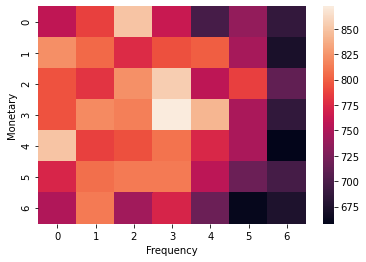

In [310]:
df_Terminal_M_F = pd.concat([(DataFrame["Terminal"].reset_index()["Terminal"]), MonetaryClustering, FrequencyClustering], ignore_index=True, axis=1)
df_Terminal_M_F.rename(columns={0:"Terminal", 1:"Monetary", 2:"Frequency"}, inplace=True)

x = df_Terminal_M_F.groupby(["Monetary", "Frequency"], as_index=False).count()
# print(x)


pivot_M_F = pd.pivot(x,index="Monetary", columns="Frequency", values="Terminal")
# print(pivot_M_F)

sns.heatmap(pivot_M_F)